In [76]:
import pickle
import numpy as np

In [77]:
with open("train_qa.txt", "rb") as fp:
    train_data =  pickle.load(fp)

In [78]:
with open("test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

# Format of the Data

In [79]:
type(test_data)

list

In [80]:
type(train_data)

list

In [81]:
len(train_data)

10000

In [82]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [83]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [84]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [85]:
train_data[0][2]

'no'

# Setting up Voc of all words

In [86]:
vocab = set()

In [87]:
all_data = test_data + train_data

In [88]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [89]:
vocab.add('no')
vocab.add('yes')

In [90]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [91]:
vocab_len = len(vocab) + 1

In [92]:
max_story_len = max([len(data[0]) for data in all_data])

In [93]:
max_story_len

156

In [94]:
max_question_len = max([len(data[1]) for data in all_data])

In [95]:
max_question_len

6

In [96]:
#vectorization of the data
vocab


{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [97]:
vocab_size = len(vocab) + 1

In [98]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [99]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [100]:
tokenizer.word_index

{'travelled': 1,
 'to': 2,
 'daniel': 3,
 'in': 4,
 'yes': 5,
 'apple': 6,
 'john': 7,
 'garden': 8,
 'kitchen': 9,
 'sandra': 10,
 'got': 11,
 'the': 12,
 'there': 13,
 '?': 14,
 'bathroom': 15,
 'journeyed': 16,
 'discarded': 17,
 'back': 18,
 'mary': 19,
 'office': 20,
 'picked': 21,
 'milk': 22,
 'hallway': 23,
 'took': 24,
 'grabbed': 25,
 'went': 26,
 'left': 27,
 'no': 28,
 'up': 29,
 'dropped': 30,
 'moved': 31,
 'football': 32,
 '.': 33,
 'bedroom': 34,
 'put': 35,
 'is': 36,
 'down': 37}

In [101]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [102]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [103]:
len(train_story_text)

10000

In [104]:
len(train_story_seq)

10000

# Functionalize Vectorization

In [105]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
       
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index) + 1)
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [106]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [107]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [108]:
inputs_test

array([[ 0,  0,  0, ..., 12, 34, 33],
       [ 0,  0,  0, ..., 12,  8, 33],
       [ 0,  0,  0, ..., 12,  8, 33],
       ...,
       [ 0,  0,  0, ..., 12,  6, 33],
       [ 0,  0,  0, ..., 12,  8, 33],
       [ 0,  0,  0, ...,  6, 13, 33]])

In [109]:
queries_test

array([[36,  7,  4, 12,  9, 14],
       [36,  7,  4, 12,  9, 14],
       [36,  7,  4, 12,  8, 14],
       ...,
       [36, 19,  4, 12, 34, 14],
       [36, 10,  4, 12,  8, 14],
       [36, 19,  4, 12,  8, 14]])

In [110]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [112]:
tokenizer.word_index['yes']

5

In [113]:
tokenizer.word_index['no']

28

# Model

In [114]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [115]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [116]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [117]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [118]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [119]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [120]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [121]:
response = add([match, input_encoded_c]) 
response = Permute((2, 1))(response) 

In [122]:
answer = concatenate([response, question_encoded])

In [123]:
answer

<tf.Tensor 'concatenate_1/Identity:0' shape=(None, 6, 220) dtype=float32>

In [124]:
answer = LSTM(32)(answer)

In [125]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) 

In [126]:
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [127]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       multiple             2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
____________________________________________________________________________________________

In [128]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=
                    ([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 5s 16ms/step - loss: 0.8968 - accuracy: 0.4859 - val_loss: 0.6952 - val_accuracy: 0.4970
Epoch 2/120
313/313 [==============================] - 4s 11ms/step - loss: 0.7016 - accuracy: 0.5056 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 4s 12ms/step - loss: 0.6959 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 4/120
313/313 [==============================] - 4s 12ms/step - loss: 0.6948 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 5/120
313/313 [==============================] - 4s 12ms/step - loss: 0.6944 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 4s 11ms/step - loss: 0.6948 - accuracy: 0.4988 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 7/120
313/313 [==============================] - 4s 12ms/step - loss: 0.6946 - accuracy: 0.4877 - val_loss: 0.6933 - val_accuracy:

313/313 [==============================] - 4s 12ms/step - loss: 0.2685 - accuracy: 0.8848 - val_loss: 0.4265 - val_accuracy: 0.8440
Epoch 58/120
313/313 [==============================] - 4s 13ms/step - loss: 0.2706 - accuracy: 0.8834 - val_loss: 0.3793 - val_accuracy: 0.8410
Epoch 59/120
313/313 [==============================] - 4s 13ms/step - loss: 0.2697 - accuracy: 0.8837 - val_loss: 0.3991 - val_accuracy: 0.8370
Epoch 60/120
313/313 [==============================] - 4s 12ms/step - loss: 0.2655 - accuracy: 0.8824 - val_loss: 0.3975 - val_accuracy: 0.8420
Epoch 61/120
313/313 [==============================] - 4s 12ms/step - loss: 0.2693 - accuracy: 0.8826 - val_loss: 0.3956 - val_accuracy: 0.8350
Epoch 62/120
313/313 [==============================] - 4s 12ms/step - loss: 0.2649 - accuracy: 0.8848 - val_loss: 0.3954 - val_accuracy: 0.8400
Epoch 63/120
313/313 [==============================] - 4s 12ms/step - loss: 0.2621 - accuracy: 0.8869 - val_loss: 0.4484 - val_accuracy: 0.826

313/313 [==============================] - 3s 9ms/step - loss: 0.2069 - accuracy: 0.9171 - val_loss: 0.5492 - val_accuracy: 0.8300
Epoch 114/120
313/313 [==============================] - 3s 8ms/step - loss: 0.2062 - accuracy: 0.9132 - val_loss: 0.5087 - val_accuracy: 0.8280
Epoch 115/120
313/313 [==============================] - 3s 9ms/step - loss: 0.2044 - accuracy: 0.9132 - val_loss: 0.5526 - val_accuracy: 0.8310
Epoch 116/120
313/313 [==============================] - 3s 9ms/step - loss: 0.1984 - accuracy: 0.9165 - val_loss: 0.5837 - val_accuracy: 0.8390
Epoch 117/120
313/313 [==============================] - 3s 8ms/step - loss: 0.2059 - accuracy: 0.9139 - val_loss: 0.5534 - val_accuracy: 0.8320
Epoch 118/120
313/313 [==============================] - 3s 9ms/step - loss: 0.2054 - accuracy: 0.9162 - val_loss: 0.5200 - val_accuracy: 0.8370
Epoch 119/120
313/313 [==============================] - 3s 8ms/step - loss: 0.2021 - accuracy: 0.9173 - val_loss: 0.5757 - val_accuracy: 0.8340

In [129]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


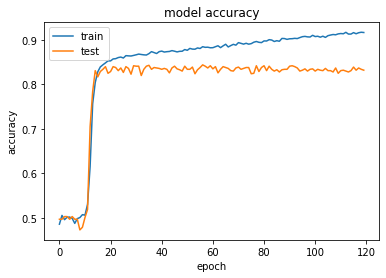

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [131]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

In [132]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [133]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [134]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [135]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [136]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9999993


In [137]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [145]:
my_question = "Is the football in the garden ?"

In [146]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [150]:
my_story = "Is the football in the garden ?"

In [151]:
my_story.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [152]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [153]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [154]:
pred_results = model.predict(([ my_story, my_ques]))

In [155]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.89885885
